<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* GridSearchCV

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
import os

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA 
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# GridSearchCV

In [3]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 'rfm_test.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'retail_data_transactions.csv',
 'retail_data_response.csv',
 'ecommerce-data.csv',
 'sample_data']

In [5]:
raw = pd.read_excel('online_retail_II.xlsx')

In [8]:
raw = skd.fetch_california_housing()
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = pd.DataFrame(raw['target'])
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [10]:
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [12]:
pred_rf = fit_rf.predict(x_te)

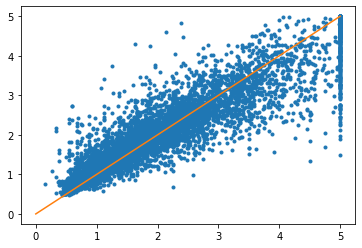

In [17]:
plt.plot(y_te.values, pred_rf, '.')
plt.plot([0,5], [0,5])

In [18]:
fit_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
param = {'n_estimators' : [10, 50, 100, 150],
         'min_samples_leaf' : [1, 2, 4, 8],
         'min_samples_split'  : [2, 4, 8]
         }

In [24]:
grid_rf = GridSearchCV(fit_rf, param_grid = param, scoring = 'neg_mean_squared_error', n_jobs = -1, verbose  = 1)
grid_rf.fit(x_tr, y_tr)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [25]:
grid_rf.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

In [26]:
fit_rf_best = RandomForestRegressor(min_samples_leaf = 2, 
                                    min_samples_split = 2,
                                    n_estimators = 100
                                    ).fit(x_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [29]:
pred_rf_best = fit_rf_best.predict(x_te)

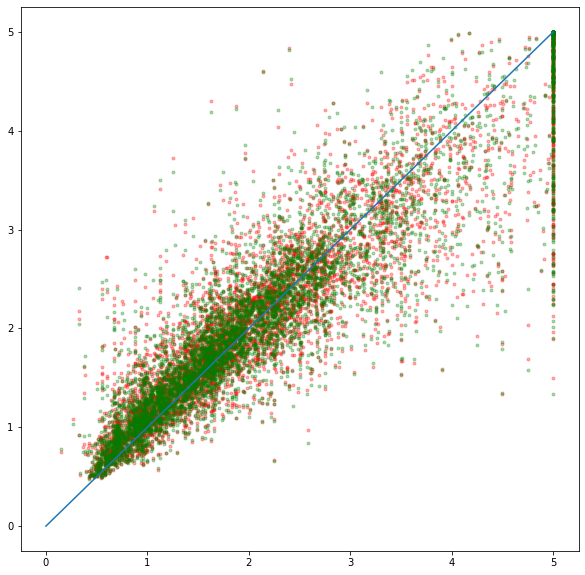

In [31]:
plt.figure(figsize = [10, 10])
plt.plot(y_te.values, pred_rf, '.', color = 'red', alpha = .3)
plt.plot(y_te.values, pred_rf_best, '.', color = 'green', alpha = .3)
plt.plot([0,5], [0,5])